In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

cmax = pd.read_csv("../data/processed/Cmax/Cmax_processed.csv.gz", compression="gzip")
cmax = cmax.groupby("Standardized_SMILES").median().reset_index()
cmax

,Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration
0,C#CC(O)(C=CCl)CC,4.257078,NaN
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049
...,...,...,...
744,[O-]c1ccc2c(c1)C13CCCCC1(O)C(C2)[NH+](CC1CCC1)CC3,8.214142,8.983693
745,[O-]c1ccc2c3c1OC1C(O)CCC4(O)C(C2)[NH+](CC2CCC2...,6.252185,6.553215
746,[O-]c1oc(C(O)CO)c([O-])c1[O-],4.069717,4.654744
747,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN


In [7]:
cmax.Standardized_SMILES.nunique()

749

In [8]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [9]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(cmax, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,median pMolar total plasma concentration,median pMolar unbound plasma concentration
0,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,5.570391,6.683900
1,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,4.997218,4.997218
2,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,4.211761,6.211761
3,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,4.470713,6.201209
4,amitriptyline hydrochloride,amitriptyline hydrochloride,amitriptyline hydrochloride,most,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,5.966001,7.187850
...,...,...,...,...,...,...,...,...,...
444,probenecid,probenecid,probenecid,no,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,3.488562,4.374619
445,impavido,miltefosine,miltefosine,no,CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C,InChI=1S/C21H46NO4P/c1-5-6-7-8-9-10-11-12-13-1...,0,3.765115,NaN
446,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,3.371591,3.371591
447,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,5.870038,NaN


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

most v.s. less: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.523e+04
less v.s. no: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.362e-04 U_stat=1.158e+04
most v.s. no: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.971e-04 U_stat=7.184e+03


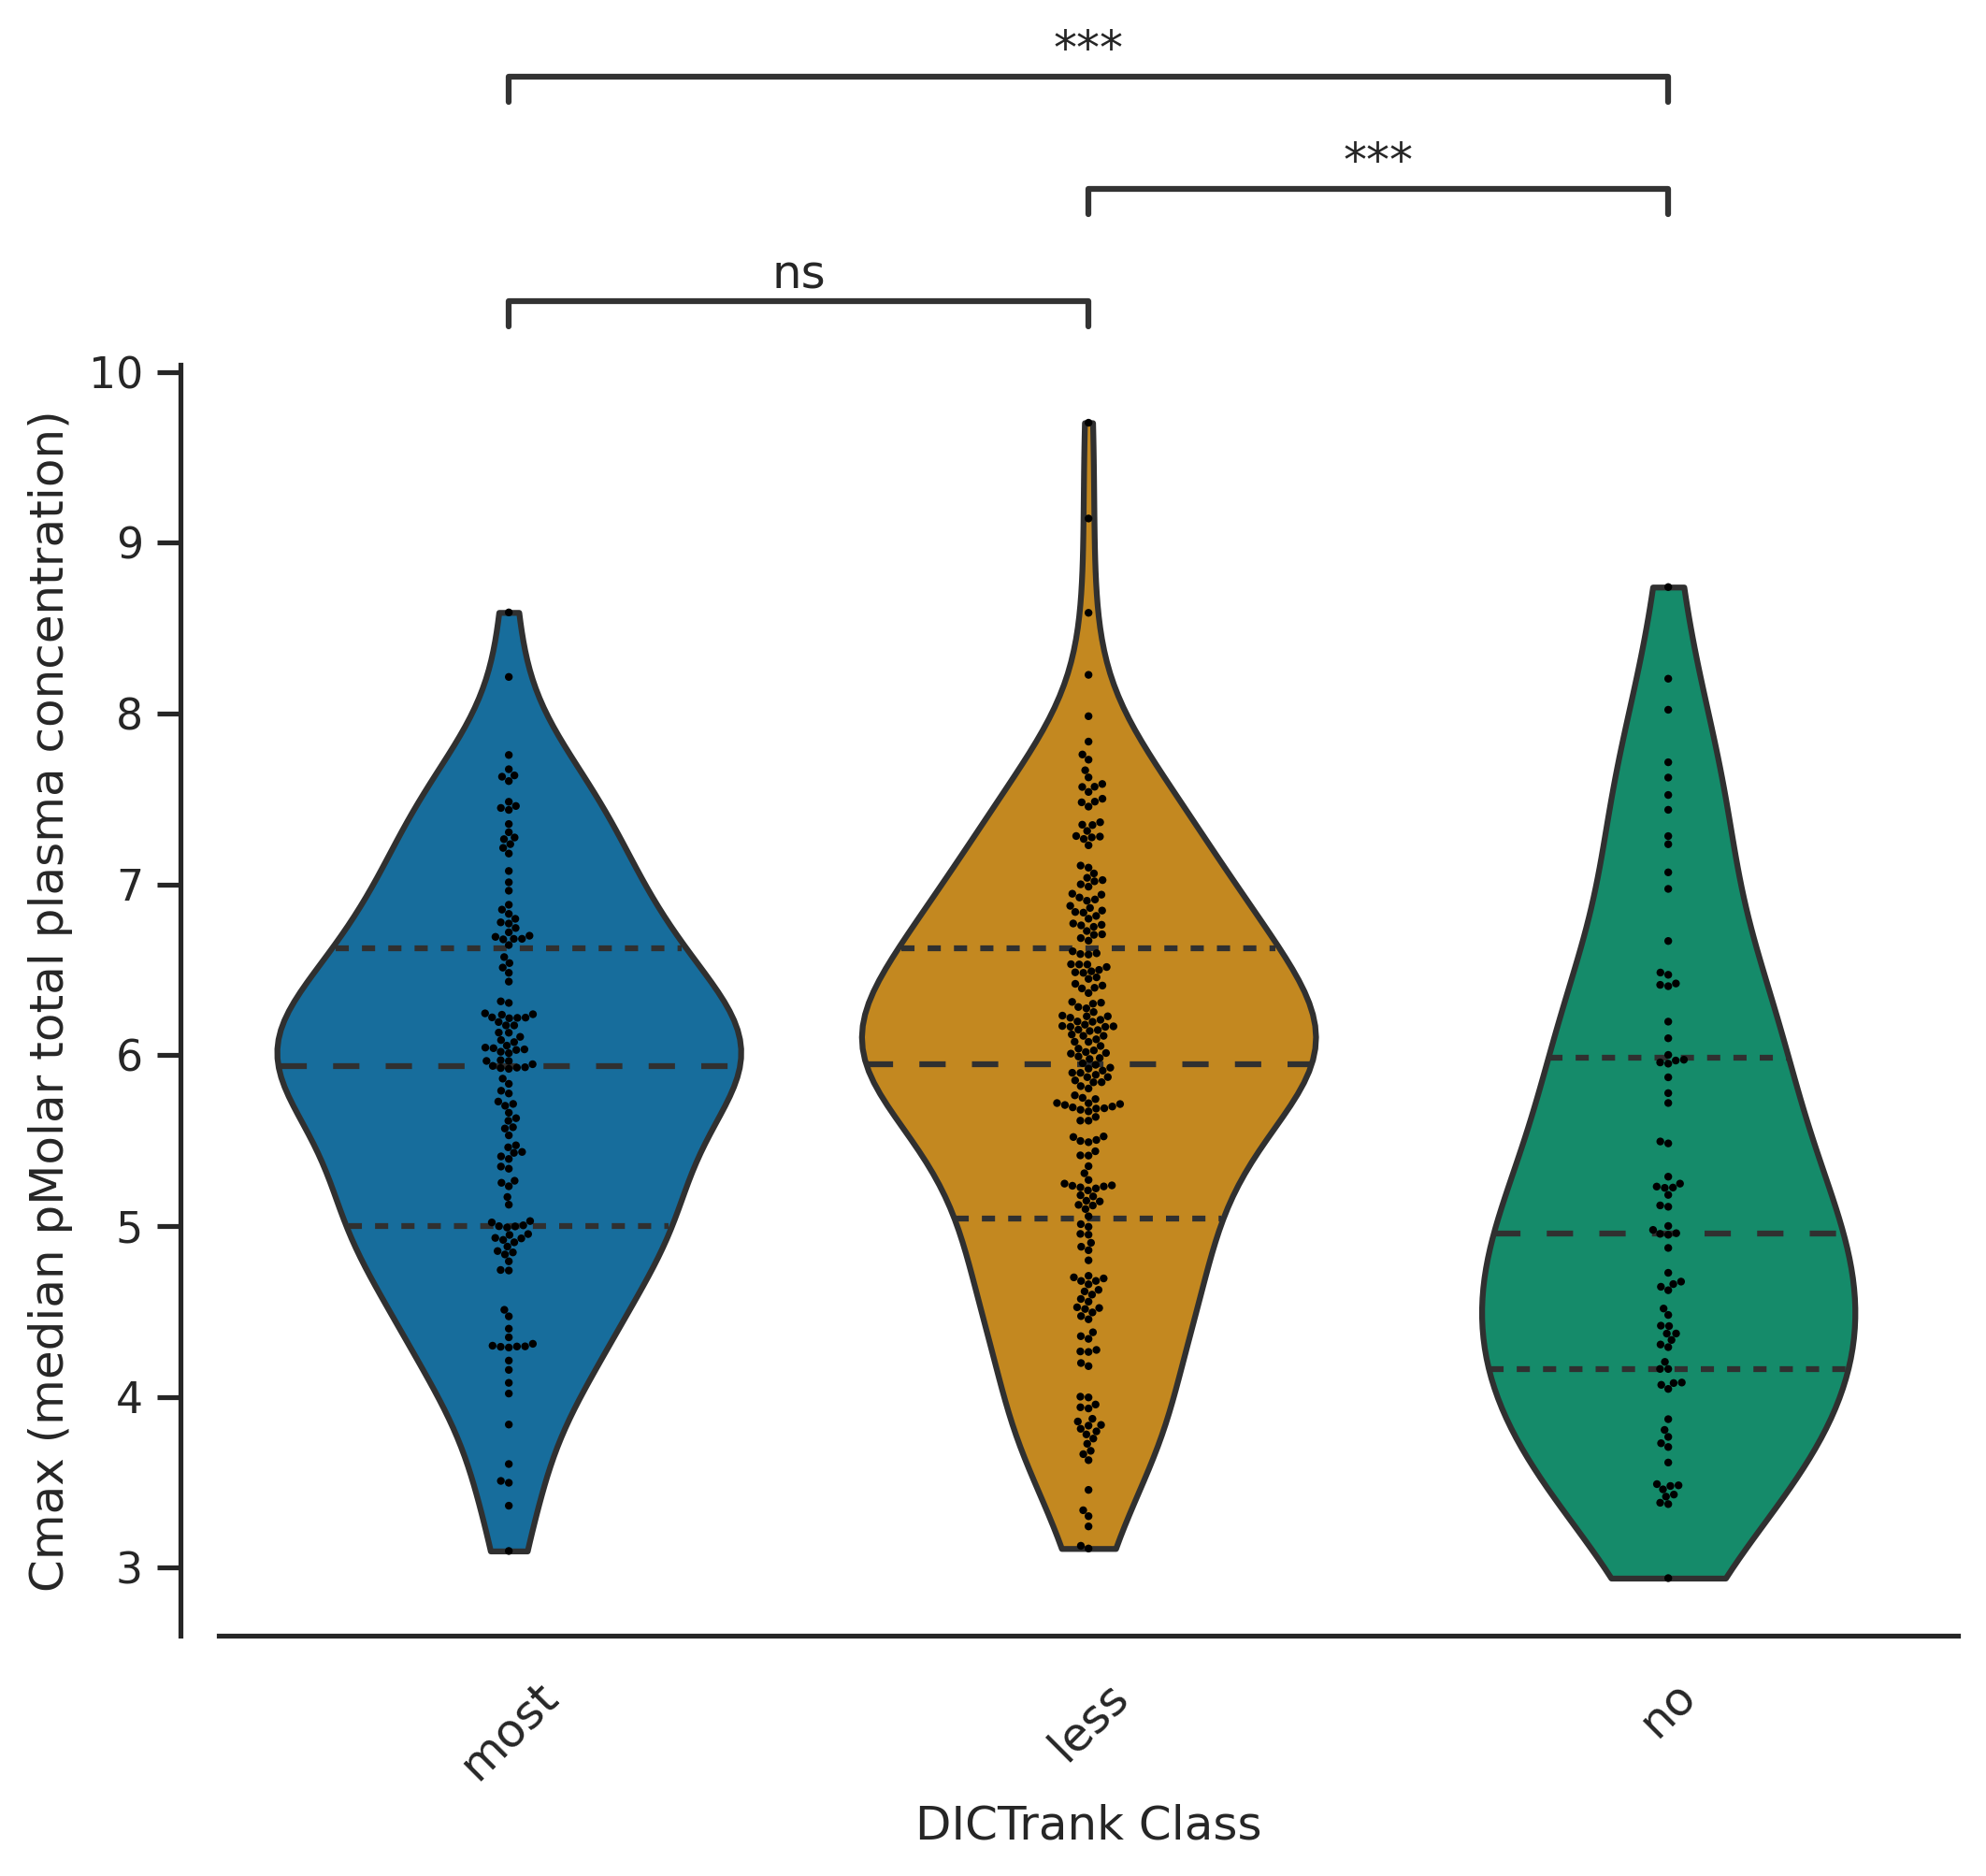

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

most v.s. less: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.186e+04
less v.s. no: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.083e-03 U_stat=6.260e+03
most v.s. no: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.582e-04 U_stat=4.801e+03


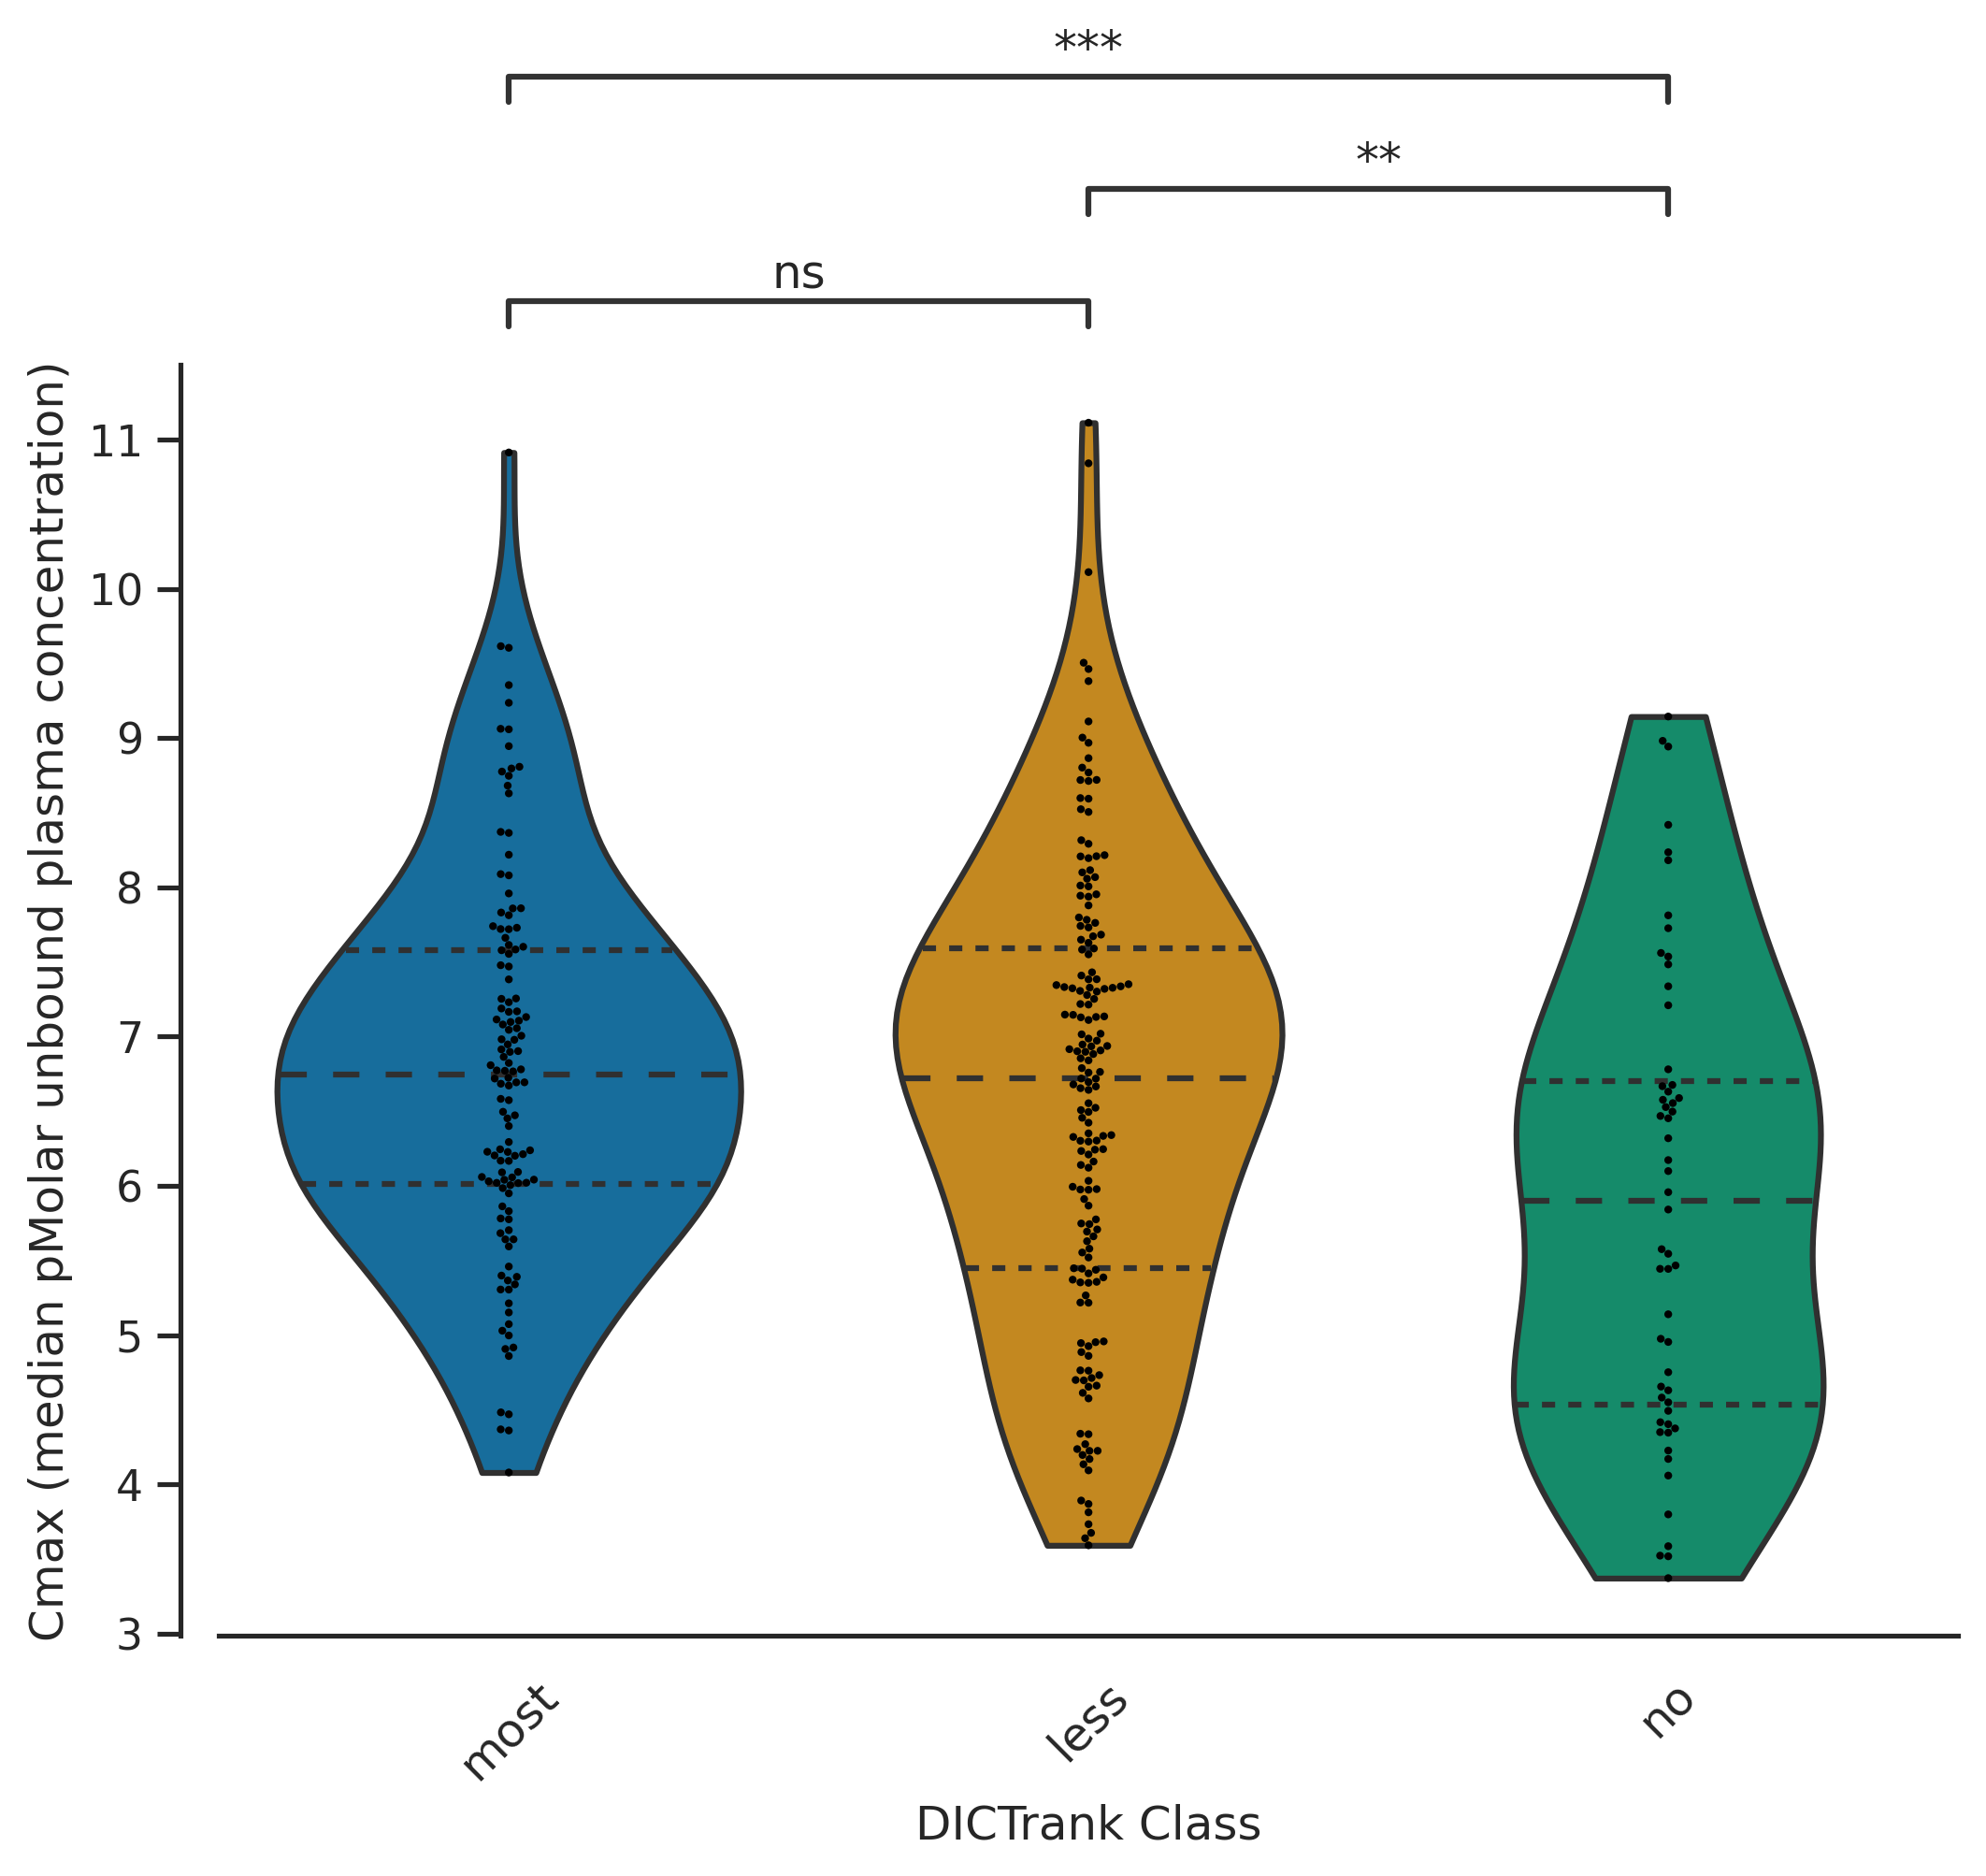

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")


for c_label in ['median pMolar total plasma concentration', 'median pMolar unbound plasma concentration']:
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300)
    sns.set(style="white")  # Set the style

    # Create the violin plot for Cmax
    ax = sns.violinplot(data=merged_df, x='DICT _ Concern', y=c_label,
                        palette=colors, inner="quart", cut=0, alpha=0.7)

    # Overlay a swarm plot on top of the violin plot
    sns.swarmplot(data=merged_df, x='DICT _ Concern', y=c_label,
                  color="black", size=2)

    # Set labels and title
    ax.set_ylabel(f'Cmax ({c_label})', fontsize=12)
    ax.set_xlabel('DICTrank Class', fontsize=12)

    # Set x-axis ticks and labels with rotation, increased fontsize
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

    # Add statistical annotations for pairwise comparisons
    box_pairs = [(("most", "less")),
                 (("most", "no")),
                 (("less", "no"))]

    add_stat_annotation(ax, data=merged_df, x='DICT _ Concern', y=c_label,
                        box_pairs=box_pairs, 
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

    # Remove box line, set y-axis on the left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')

    # Show the plot
    plt.savefig(f'{c_label}_violinswarm_comparison_with_stats.png', bbox_inches='tight')
    plt.show()
